In [1]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
ev_data = pd.read_csv('../Data/IEA-EV-data.csv')

In [3]:
ev_df = (
ev_data
    .assign(
        **{c:lambda df_,c=c:df_[c].astype('category') for c in ['region','category','parameter','mode','powertrain','unit']},
        year = lambda df_:df_['year'].astype("int16")
    )
)

In [138]:
# Get only historical data of charging points.
ev_his_df = ev_df[(ev_df["category"]=="Historical") & (ev_df["parameter"] == "EV charging points")]
# ev_his_df = ev_df.query("category=='Historical' and parameter == 'EV charging points'")
ev_his_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
38,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.000000
39,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,436.000000
43,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.093887
44,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,665.923340
55,Australia,Historical,EV charging points,EV,Publicly available fast,2019,charging points,251.000000


In [24]:
# ev_his_df.category.value_counts()
# ev_his_df.parameter.value_counts()

### Fast Charging stations in `['China','Europe','USA','Rest of the world']` by year.

In [154]:
# Get data for China,Europe,USA,Rest of the World
data = (ev_his_df
        .query("region in ['China','Europe','USA','Rest of the world'] and powertrain=='Publicly available fast'")
        .assign(
                region     = lambda df_:df_["region"].to_list(),
                powertrain = lambda df_:df_["powertrain"].to_list(),
        )
        .groupby(['region','year','powertrain'])['value']
        .sum()
        .reset_index()
        .assign(
            value= lambda df_:df_["value"]/1000
        )
        .sort_values("year")
        .reset_index(drop = True)
       )

Text(0, 0.5, 'Thousands')

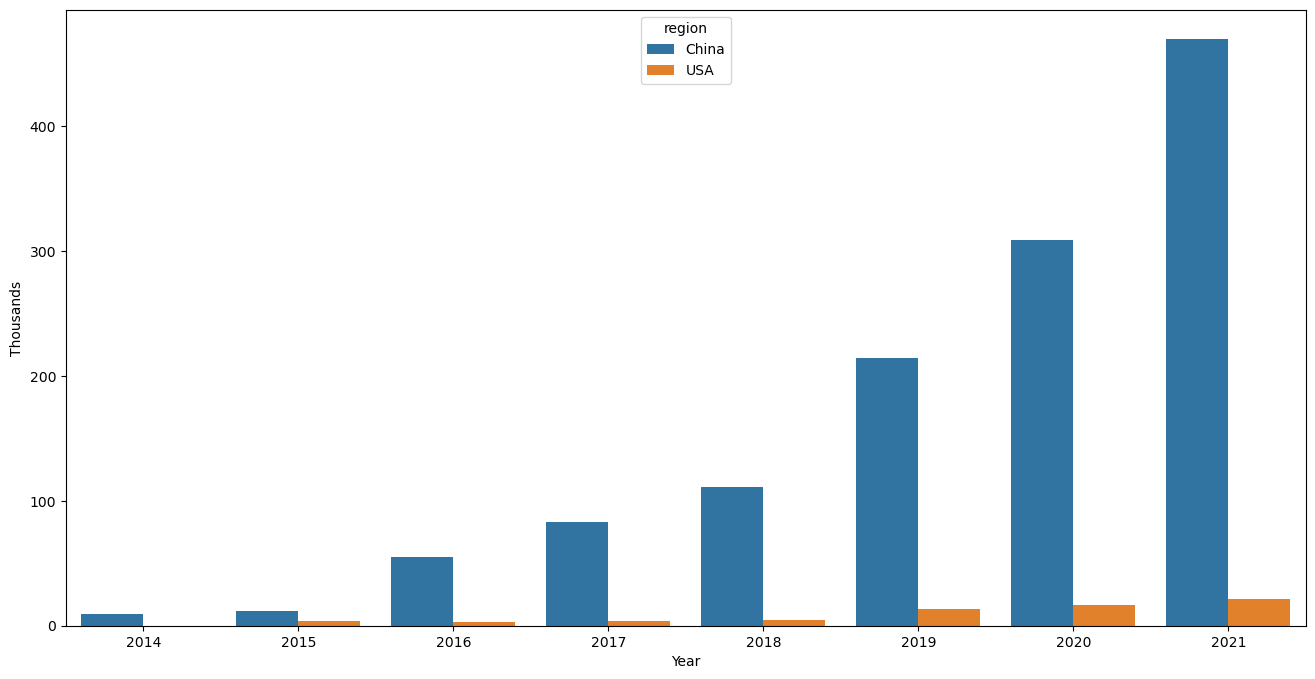

In [156]:
plt.figure(figsize=(16,8))
sns.barplot(data= data, x='year', y="value",hue="region")
plt.xlabel("Year")
plt.ylabel("Thousands")